# Problem Statement:
The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health
insurance carrier and its plans and perks while keeping the projected cost from our
study in mind. This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.

Data ingestion

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("insurance.csv")

In [3]:
data.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [4]:
data.shape

(1338, 7)

In [5]:
data.describe().T

count          mean           std      min        25%      50%  \
age       1338.0     39.207025     14.049960    18.00    27.0000    39.00   
bmi       1338.0     30.665471      6.098382    16.00    26.3000    30.40   
children  1338.0      1.094918      1.205493     0.00     0.0000     1.00   
expenses  1338.0  13270.422414  12110.011240  1121.87  4740.2875  9382.03   

                75%       max  
age          51.000     64.00  
bmi          34.700     53.10  
children      2.000      5.00  
expenses  16639.915  63770.43

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [119]:
data.isnull()

age    sex    bmi  children  smoker  region  expenses
0     False  False  False     False   False   False     False
1     False  False  False     False   False   False     False
2     False  False  False     False   False   False     False
3     False  False  False     False   False   False     False
4     False  False  False     False   False   False     False
...     ...    ...    ...       ...     ...     ...       ...
1333  False  False  False     False   False   False     False
1334  False  False  False     False   False   False     False
1335  False  False  False     False   False   False     False
1336  False  False  False     False   False   False     False
1337  False  False  False     False   False   False     False

[1337 rows x 7 columns]

In [10]:
# will find missing values

In [11]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [13]:
categorical_feature=[feature for feature in data.columns if data[feature].dtype == 'O']
categorical_feature

['sex', 'smoker', 'region']

In [14]:
numerical_features=[feature for feature in data.columns if data[feature].dtype != 'O']
    
print('No of numerical variables :', len(numerical_features))
data[numerical_features].head()

No of numerical variables : 4


age   bmi  children  expenses
0   19  27.9         0  16884.92
1   18  33.8         1   1725.55
2   28  33.0         3   4449.46
3   33  22.7         0  21984.47
4   32  28.9         0   3866.86

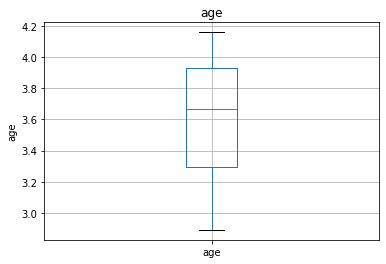

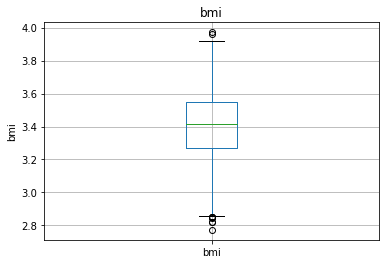

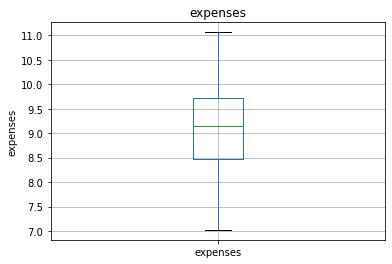

In [15]:
for feature in numerical_features:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

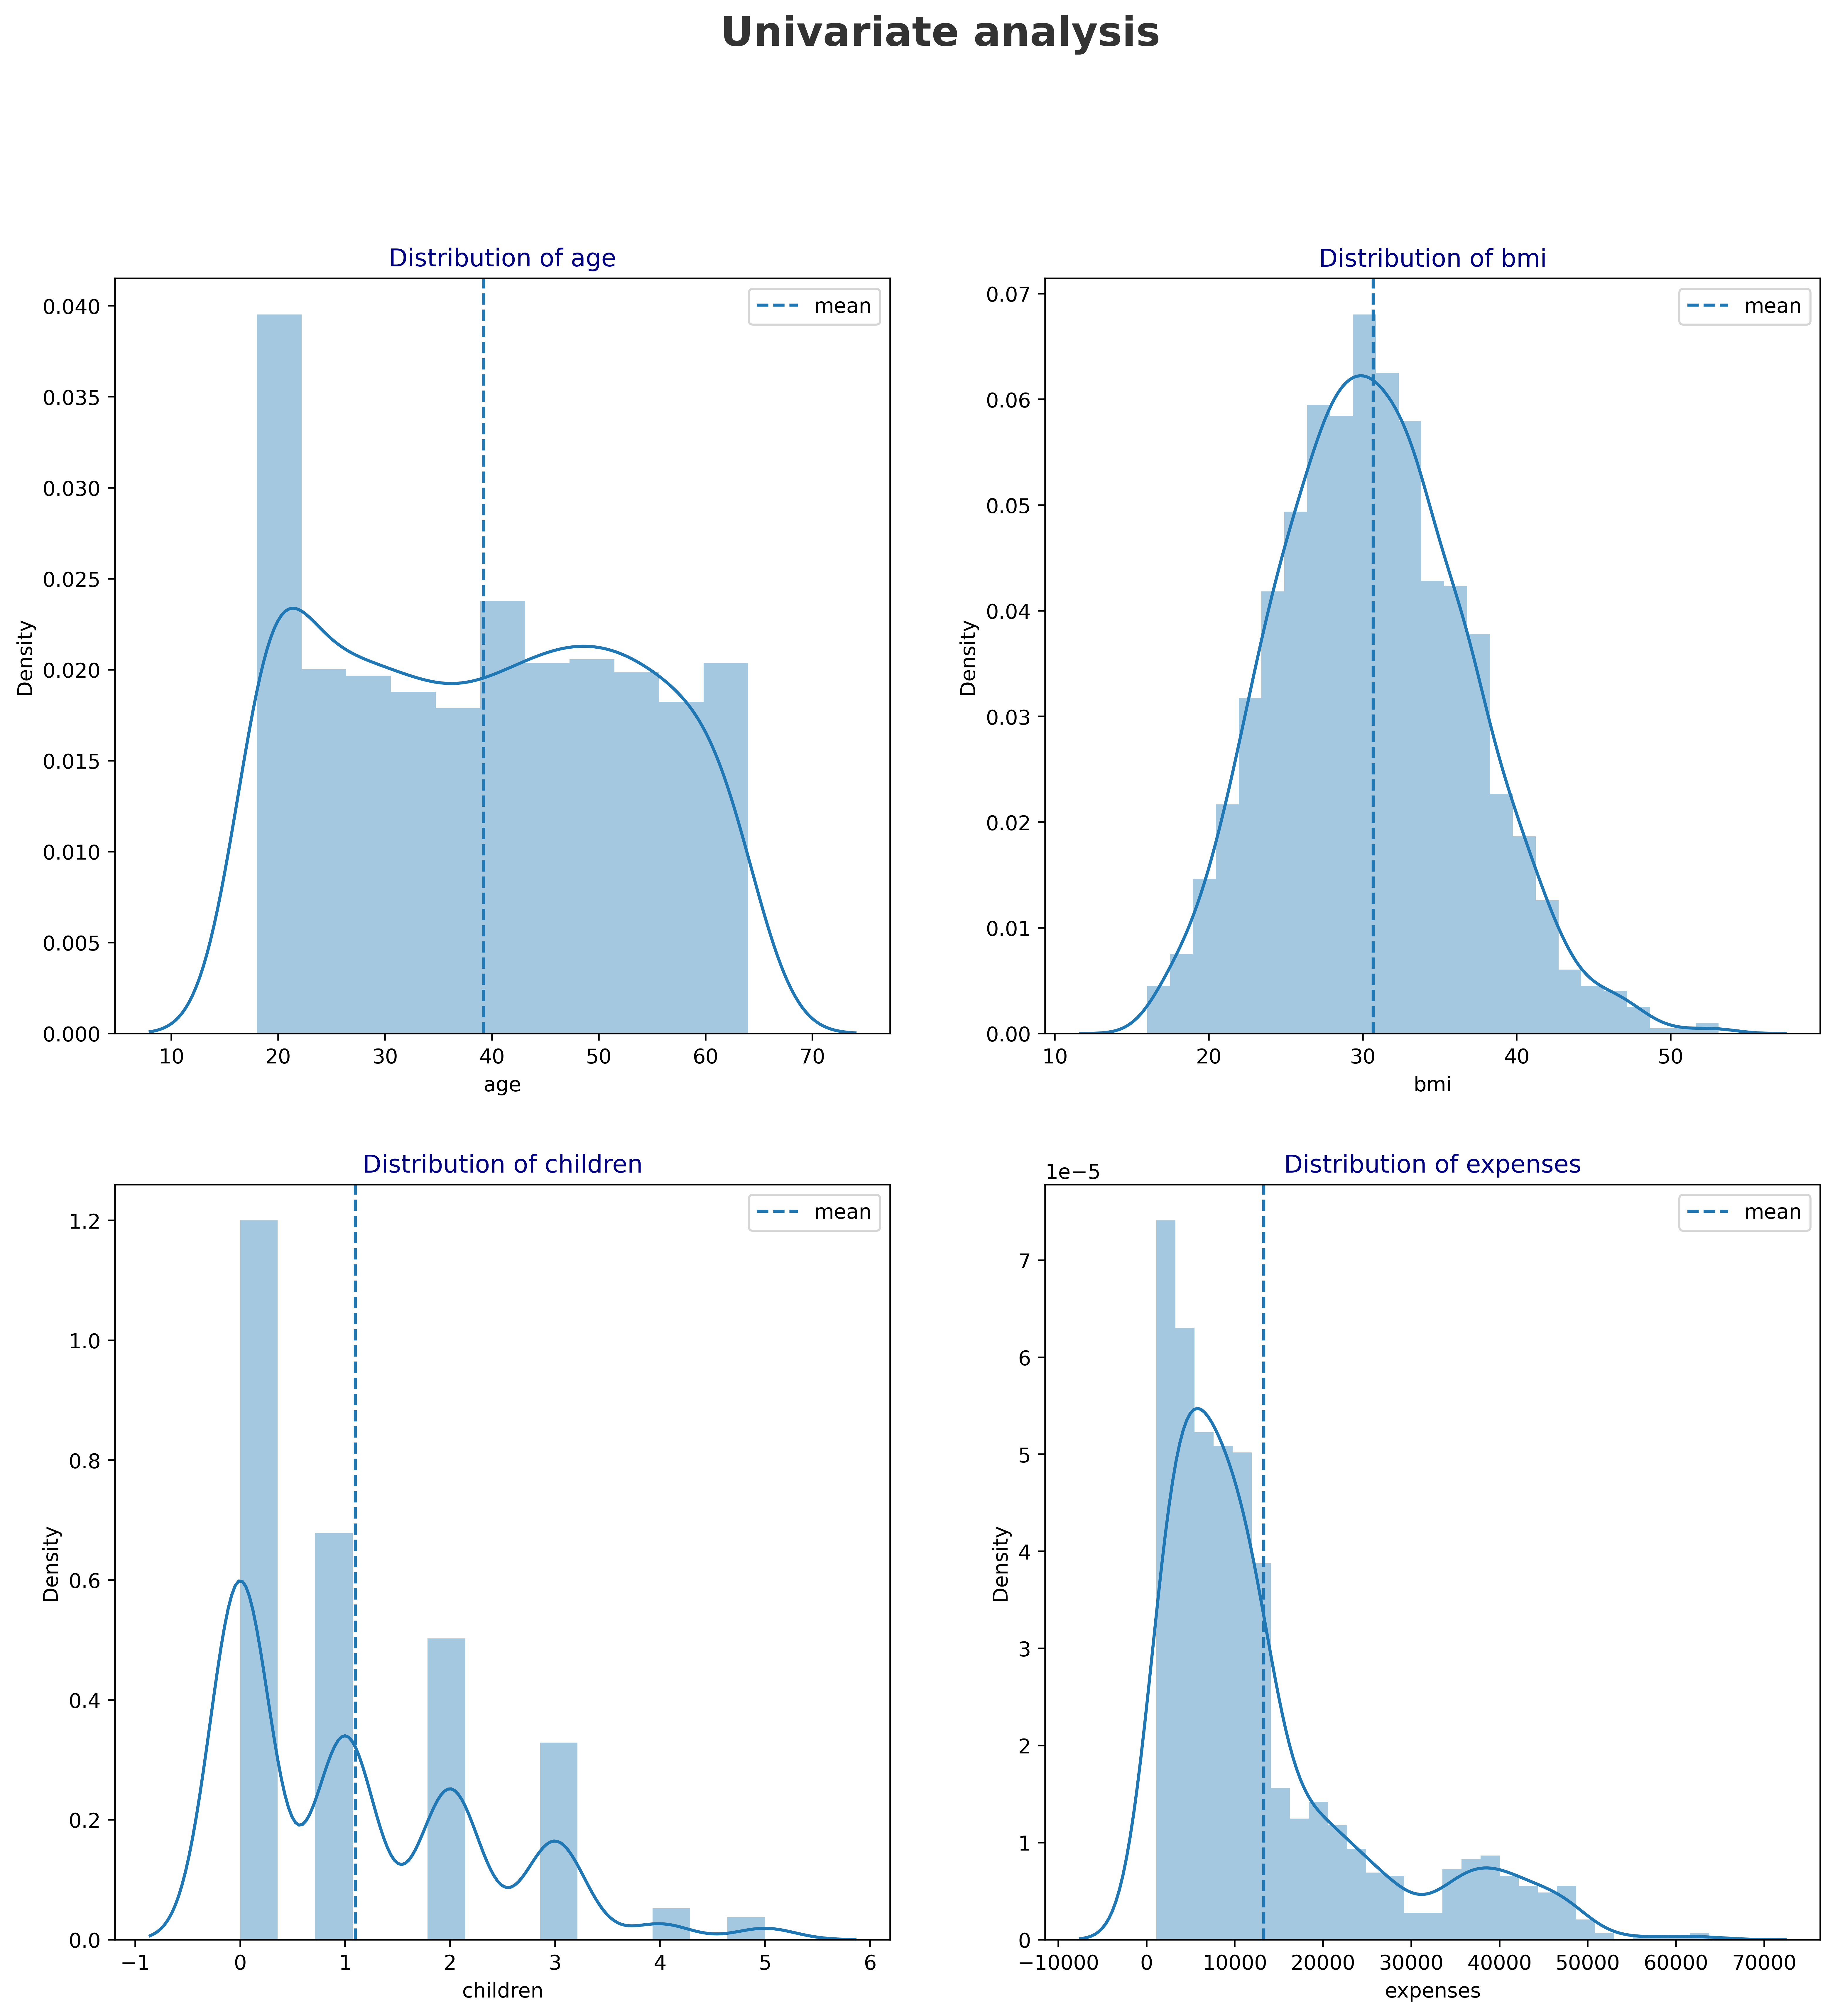

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), dpi=500)
fig.suptitle('Univariate analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i, column in enumerate(numerical_features):
    ax= axes [i // 2, i%2]
    sns.distplot(x=data[column], kde=True, ax=ax)
    ax.axvline(data[column].mean(), linestyle='dashed', label='mean')
    ax.set_xlabel(column)
    ax.legend(loc='best')
    ax.set_title(f'Distribution of {column}', color='navy')


In [17]:
data.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [18]:
def age_group(X):
    if X in range(18,20):
        return '18-20'
    if X in range(20,30):
        return '20-30'
    if X in range(30,40):
        return '30-40'
    if X in range(40,50):
        return '40-50'
    elif X in range(50,60):
        return '50-60'
    else:
        return '60+'

In [19]:
data['age_group']=data['age'].apply(age_group)

In [20]:
def plot_age_distribution(data):
    
    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 8))

    total = float(len(data))

    ax = sns.countplot(x="age_group", data=data)

    plt.title('Age of Current Health Insurers', fontsize=20)
    plt.xlabel('Age Group')
    plt.ylabel('Count')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

    plt.show()

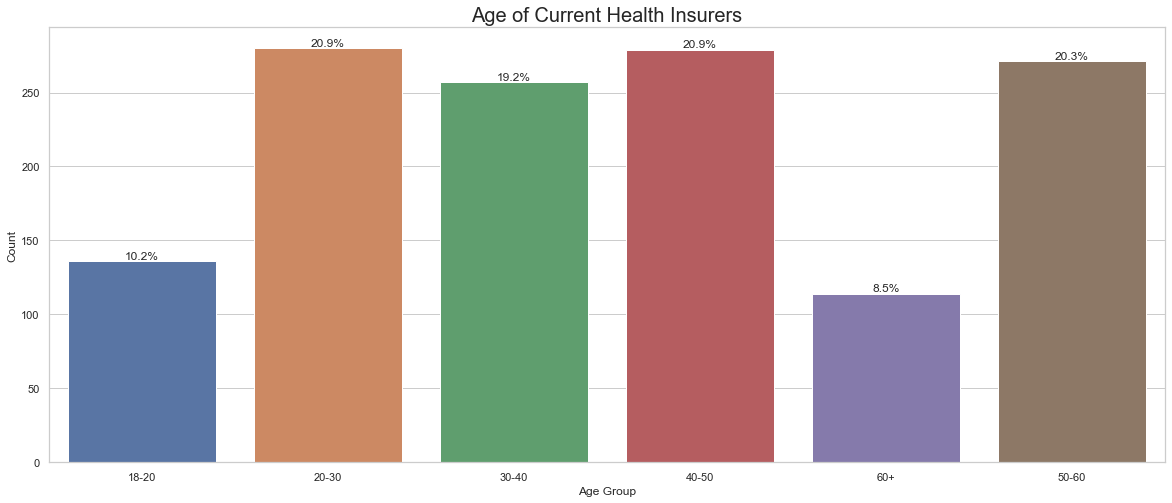

In [21]:
plot_age_distribution(data)

In [22]:
data.drop(["age_group"], axis=1, inplace=True)

In [23]:
fig = px.histogram(data, x='region', color="sex")
fig.update_layout(
        title='Histogram of Health Insurers by Region and Sex',
        xaxis_title='Region',
        yaxis_title='Count',
        bargap=0.2)
fig.show()

<IPython.core.display.Javascript object>

In [24]:
fig = px.histogram(data, x='sex')
fig.update_layout(
        title='Distribution of genders in the Dataset',
        xaxis_title='Sex',
        yaxis_title='Count',
        bargap=0.2
    )
fig.show()

<IPython.core.display.Javascript object>

In [25]:
fig = px.histogram(data, x='smoker', 
                       labels={'smoker': 'Smoker Status', 'count': 'Count'},
                       category_orders={'smoker': ['No', 'Yes']},
                       color_discrete_sequence=['skyblue'],
                       opacity=0.8,
                       template='plotly_white')

fig.update_layout(title='Distribution of Smokers',bargap=0.2)

fig.show()

<IPython.core.display.Javascript object>

In [26]:
fig = px.histogram(data, x='children')
fig.update_layout(
        title='Distribution of of Number of Children in the Dataset',
        xaxis_title='Number of Children',
        yaxis_title='Count',
        bargap=0.2
    )
fig.show()


<IPython.core.display.Javascript object>

In [27]:
def plot_children_distribution(data):
    
    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 8))
    total = float(len(data))

    ax = sns.countplot(x="children", data=data)

    plt.title('Number of Children of Current Health Insurers', fontsize=20)
    plt.xlabel('Number of Children')
    plt.ylabel('Count')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
        plt.show()


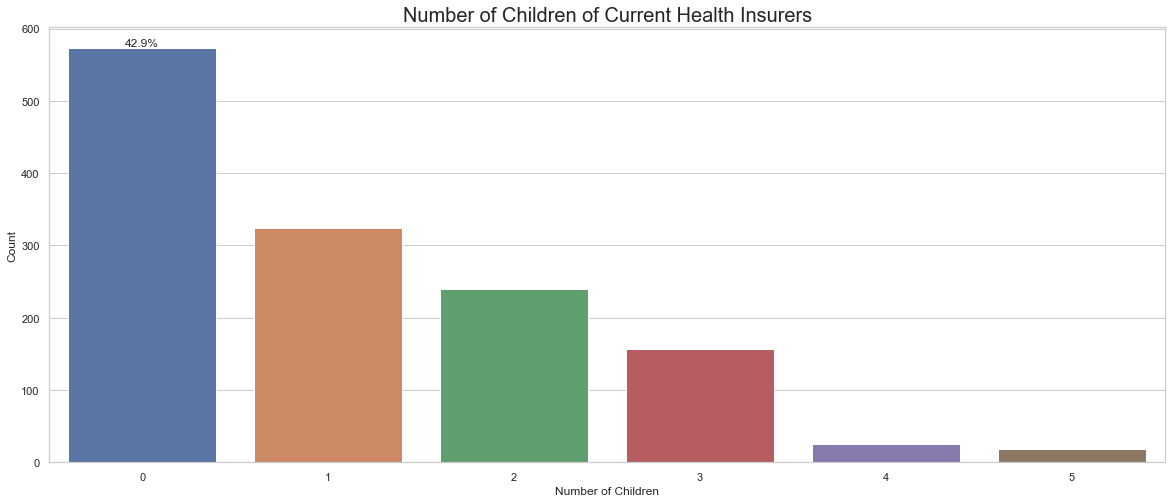

In [28]:
plot_children_distribution(data)


In [29]:
# Create a scatter plot to visualize the relationship between age and expenses
scatter_fig = px.scatter(data, x="age", y="expenses", color="region", symbol="sex",
                         hover_data=['bmi', 'smoker', 'children'])

scatter_fig.update_layout(title_text='Relationship between Age and Expenses', title_font_size=20)

scatter_fig.show()

<IPython.core.display.Javascript object>

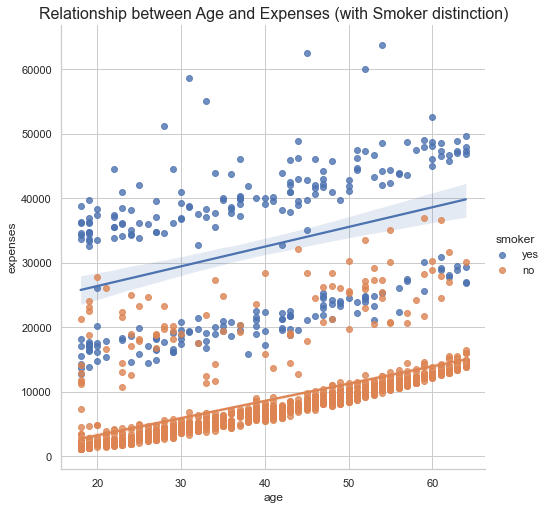

In [30]:
# Create a scatter plot with a linear regression model fit line
sns.lmplot(data=data, x='age', y='expenses', hue="smoker", height=7)


plt.title('Relationship between Age and Expenses (with Smoker distinction)', fontsize=16)


plt.show()

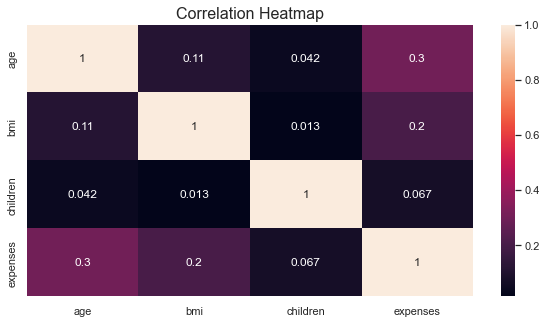

In [31]:
plt.figure(figsize=(10, 5))


corr = data.corr()

# Create a heatmap to visualize the correlation matrix with annotations
ax = sns.heatmap(corr, annot=True)

plt.title('Correlation Heatmap', fontsize=16)


plt.show()

# Feature Engineering

In [32]:
df = pd.get_dummies(data,columns = ['sex', 'smoker', 'region'],drop_first = True)

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


x=df.drop(columns=['expenses'], axis=1)
y=df['expenses']

# Model Building

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [96]:
def evaluate_model(true, predicted, x_test):
    
    mse = mean_squared_error(true, predicted)  
    mae = mean_absolute_error(true, predicted)  
    rmse = np.sqrt(mse)  
    adj_r2 = 1 - (1 - r2) * (len(true) - 1) / (len(true) - x_test.shape[1] - 1)  # Calculate Adjusted R2 Score

    return mse, mae, rmse, r2, adj_r2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def evaluate_models(x, y, models):
    
    train_metrics = []
    test_metrics = []
     # Separate dataset into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Scaling the dataset
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    for model_name, model in models.items():
        model.fit(x_train, y_train)  # Train the model

        # Make predictions on training and test sets
        y_train_pred = model.predict(x_train)
        y_test_pred = model.predict(x_test)

        # Evaluate model performance for training set
        train_metrics.append(evaluate_model_metrics(model_name, y_train, y_train_pred, x_train))

        # Evaluate model performance for test set
        test_metrics.append(evaluate_model_metrics(model_name, y_test, y_test_pred, x_test))

    # Create DataFrames for training and test set metrics
    train_report = pd.DataFrame(train_metrics, columns=['Model', 'Train Mean Squared Error',
                                                        'Train Mean Absolute Error',
                                                        'Train Root Mean Squared Error',
                                                        'Train R Squared', 'Train Adjusted R2 Score'])

    test_report = pd.DataFrame(test_metrics, columns=['Model', 'Test Mean Squared Error',
                                                      'Test Mean Absolute Error',
                                                      'Test Root Mean Squared Error',
                                                      'Test R Squared', 'Test Adjusted R2 Score'])

    return train_report, test_report


def evaluate_model_metrics(model_name, true, predicted, x):
   
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_score_value = r2_score(true, predicted)
    adj_r2_score = 1 - (1 - r2_score_value) * (len(true) - 1) / (len(true) - x.shape[1] - 1)
    return model_name, mse, mae, rmse, r2_score_value, adj_r2_score

In [97]:
# Dictionary which contains models for the experiment
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=1),
    "Lasso Regression": Lasso(random_state=1),
    "Support Vector Regression": SVR(kernel='linear'),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=1),
    "Bagging Regressor": BaggingRegressor(random_state=1),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=1),
    "XGB Regressor": XGBRegressor()
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
train_report_df, test_report_df = evaluate_models(x,y, models)

In [99]:
train_report_df

Model  Train Mean Squared Error  \
0            Linear Regression              3.697593e+07   
1             Ridge Regression              3.697602e+07   
2             Lasso Regression              3.697594e+07   
3    Support Vector Regression              1.383175e+08   
4      Decision Tree Regressor              0.000000e+00   
5            Bagging Regressor              4.621008e+06   
6           AdaBoost Regressor              2.570912e+07   
7  Gradient Boosting Regressor              1.553547e+07   
8                XGB Regressor              7.251511e+05   

   Train Mean Absolute Error  Train Root Mean Squared Error  Train R Squared  \
0                4181.825636                    6080.783489         0.729935   
1                4182.839731                    6080.791117         0.729934   
2                4181.745957                    6080.784798         0.729934   
3                7570.663458                   11760.844332        -0.010246   
4                   0.000000                       0.000000         1.000000   
5                1091.474835                    2149.652930         0.966249   
6                4081.373927                    5070.415773         0.812225   
7                2159.432938                    3941.506281         0.886532   
8                 504.550203                     851.558068         0.994704   

   Train Adjusted R2 Score  
0                 0.727896  
1                 0.727896  
2                 0.727896  
3                -0.017870  
4                 1.000000  
5                 0.965994  
6                 0.810808  
7                 0.885675  
8                 0.994664

In [100]:
test_report_df

Model  Test Mean Squared Error  \
0            Linear Regression             3.548147e+07   
1             Ridge Regression             3.551590e+07   
2             Lasso Regression             3.548880e+07   
3    Support Vector Regression             1.914900e+08   
4      Decision Tree Regressor             3.815840e+07   
5            Bagging Regressor             2.568503e+07   
6           AdaBoost Regressor             2.641362e+07   
7  Gradient Boosting Regressor             1.827638e+07   
8                XGB Regressor             2.797412e+07   

   Test Mean Absolute Error  Test Root Mean Squared Error  Test R Squared  \
0               4177.267596                   5956.632572        0.806910   
1               4179.843668                   5959.522021        0.806723   
2               4177.435834                   5957.247633        0.806870   
3               8689.314557                  13837.991788       -0.042088   
4               2963.877127                   6177.248887        0.792342   
5               2815.656030                   5068.040212        0.860222   
6               4259.669496                   5139.417824        0.856257   
7               2523.249757                   4275.088482        0.900540   
8               3102.639577                   5289.056900        0.847765   

   Test Adjusted R2 Score  
0                0.800946  
1                0.800753  
2                0.800905  
3               -0.074276  
4                0.785928  
5                0.855905  
6                0.851817  
7                0.897468  
8                0.843063

# Hyperparameter Tunning

In [102]:
# Create the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [2, 3, 4, 5, 6, 7, 8]
}

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [103]:
# create the model
hpt_model = GradientBoostingRegressor()

In [107]:
from sklearn.model_selection import GridSearchCV

# create the grid search object
grid_search = GridSearchCV(hpt_model, param_grid, cv=10, n_jobs=-1, verbose=1)

In [109]:
# fit the grid search object to the training data
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             verbose=1)

In [110]:
# print the best parameters
print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}


# Final model building

In [111]:
# create the model with the best parameters
final_model = GradientBoostingRegressor(n_estimators=grid_search.best_params_['n_estimators'], 
                                        max_depth=grid_search.best_params_['max_depth'],
                                        learning_rate=grid_search.best_params_['learning_rate'])

In [112]:
# fit the model to the training data
final_model.fit(x_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=200)

In [113]:
# evaluate the model on the test data
print(final_model.score(x_test, y_test))

0.8979260661468592


In [116]:
y_pred = grid_search.predict(x_test)

In [117]:
print('Mean Squared Error is: ', mean_squared_error(y_test,y_pred))
print('Mean Absolute Error is: ', mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Accuracy is: {} %'.format(round((r2_score(y_test, y_pred))*100,3)))
score = round((r2_score(y_test, y_pred))*100,3)
print('R2 Adjusted score is: {} %'.format(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)))

Mean Squared Error is:  18756704.78125713
Mean Absolute Error is:  2561.181987343039
Root Mean Squared Error is:  4330.901151175945
Accuracy is: 89.793 %
R2 Adjusted score is: 92.53564092664094 %
